In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
tqdm.pandas()

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/twitter/twitter.csv").drop(columns=["Unnamed: 0"])

In [ ]:
data.head()

,Tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.columns

Index(['Tweet'], dtype='object')

In [ ]:
data.dtypes

Tweet    object
dtype: object

## Cleanning

In [ ]:
def cleantweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT : ', '', text)  # Remove "RT:" (if present)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove all URLs
    text = re.sub(r'[^\w\s\-_]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
data['Tweet']=data['Tweet'].progress_apply(cleantweet)

100%|██████████| 1600000/1600000 [00:32<00:00, 49090.11it/s]


In [ ]:
data['Tweet']

0          - Awww thats a bummer You shoulda got David Ca...
1          is upset that he cant update his Facebook by t...
2          I dived many times for the ball Managed to sav...
3             my whole body feels itchy and like its on fire
4          no its not behaving at all im mad why am i her...
                                 ...                        
1599995    Just woke up Having no school is the best feel...
1599996    TheWDBcom - Very cool to hear old Walt intervi...
1599997    Are you ready for your MoJo Makeover Ask me fo...
1599998    Happy 38th Birthday to my boo of alll time Tup...
1599999                                 happy charitytuesday
Name: Tweet, Length: 1600000, dtype: object

In [ ]:
 sid_obj = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(tweet_text):
    # Analyze sentiment using vaderSentiment
    polarity = sid_obj.polarity_scores(tweet_text)
    polarity=polarity['compound']
    # Analyze sentiment using TextBlob
    analysis = TextBlob(tweet_text)
    subjectivity = analysis.sentiment.subjectivity

    return polarity, subjectivity


In [ ]:
data['Tweet'].isna().sum()

0

In [ ]:
data[['Polarity', 'Subjectivity']] = data['Tweet'].progress_apply(lambda x: pd.Series(get_sentiment(x)))


100%|██████████| 1600000/1600000 [19:16<00:00, 1383.15it/s]


In [ ]:
data["Polarity"][0]

-0.3818

In [ ]:
data.to_csv("/content/drive/MyDrive/twitter/p_s.csv")

In [ ]:
data


,Tweet,Polarity,Subjectivity
0,- Awww thats a bummer You shoulda got David Ca...,-0.3818,0.4500
1,is upset that he cant update his Facebook by t...,-0.7269,0.0000
2,I dived many times for the ball Managed to sav...,0.4939,0.5000
3,my whole body feels itchy and like its on fire,-0.2500,0.4000
4,no its not behaving at all im mad why am i her...,-0.6597,1.0000
...,...,...,...
1599995,Just woke up Having no school is the best feel...,0.5423,0.3000
1599996,TheWDBcom - Very cool to hear old Walt intervi...,0.3804,0.5225
1599997,Are you ready for your MoJo Makeover Ask me fo...,0.3612,0.5000
1599998,Happy 38th Birthday to my boo of alll time Tup...,0.5719,1.0000


In [ ]:
def categorize_polarity(polarity_score, threshold=0.1):
    if polarity_score > threshold:
        sentiment = "positive"
    elif polarity_score < -threshold:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    sentiment_mapping = {"positive": 1, "negative": 2, "neutral": 0}

    label = sentiment_mapping[sentiment]

    return sentiment, label

In [ ]:
data['sentiment'], data['label'] = zip(*data['Polarity'].apply(categorize_polarity))


In [ ]:
data.head()

,Tweet,Polarity,Subjectivity,sentiment,label
0,- Awww thats a bummer You shoulda got David Ca...,-0.3818,0.45,negative,2
1,is upset that he cant update his Facebook by t...,-0.7269,0.00,negative,2
2,I dived many times for the ball Managed to sav...,0.4939,0.50,positive,1
3,my whole body feels itchy and like its on fire,-0.2500,0.40,negative,2
4,no its not behaving at all im mad why am i her...,-0.6597,1.00,negative,2


In [ ]:
data[data['sentiment'] == 'negative'].head()

,Tweet,Polarity,Subjectivity,sentiment,label
0,- Awww thats a bummer You shoulda got David Ca...,-0.3818,0.45,negative,2
1,is upset that he cant update his Facebook by t...,-0.7269,0.00,negative,2
3,my whole body feels itchy and like its on fire,-0.2500,0.40,negative,2
4,no its not behaving at all im mad why am i her...,-0.6597,1.00,negative,2
12,I couldnt bear to watch it And I thought the U...,-0.5994,0.00,negative,2


In [ ]:
data[data['sentiment'] == 'positive'].head()

,Tweet,Polarity,Subjectivity,sentiment,label
2,I dived many times for the ball Managed to sav...,0.4939,0.500000,positive,1
6,Need a hug,0.4767,0.000000,positive,1
7,hey long time no see Yes Rains a bit only a bi...,0.5824,0.560000,positive,1
14,i wouldve been the first but i didnt have a gu...,0.3724,0.266667,positive,1
15,I wish I got to watch it with you I miss you a...,0.2732,0.000000,positive,1


In [ ]:
data[data['sentiment'] == 'neutral'].head()

,Tweet,Polarity,Subjectivity,sentiment,label
5,not the whole crew,0.0,0.400000,neutral,0
8,_K nope they didnt have it,0.0,0.000000,neutral,0
9,que me muera,0.0,0.000000,neutral,0
10,spring break in plain city its snowing,0.0,0.357143,neutral,0
11,I just re-pierced my ears,0.0,0.000000,neutral,0


In [ ]:
data

,Tweet,Polarity,Subjectivity,sentiment,label
0,- Awww thats a bummer You shoulda got David Ca...,-0.3818,0.4500,negative,2
1,is upset that he cant update his Facebook by t...,-0.7269,0.0000,negative,2
2,I dived many times for the ball Managed to sav...,0.4939,0.5000,positive,1
3,my whole body feels itchy and like its on fire,-0.2500,0.4000,negative,2
4,no its not behaving at all im mad why am i her...,-0.6597,1.0000,negative,2
...,...,...,...,...,...
1599995,Just woke up Having no school is the best feel...,0.5423,0.3000,positive,1
1599996,TheWDBcom - Very cool to hear old Walt intervi...,0.3804,0.5225,positive,1
1599997,Are you ready for your MoJo Makeover Ask me fo...,0.3612,0.5000,positive,1
1599998,Happy 38th Birthday to my boo of alll time Tup...,0.5719,1.0000,positive,1


In [ ]:
data.to_csv("/content/drive/MyDrive/twitter/clean.csv")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/twitter/clean.csv").drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,Tweet,Polarity,Subjectivity,sentiment,label
0,- Awww thats a bummer You shoulda got David Ca...,-0.3818,0.45,negative,2
1,is upset that he cant update his Facebook by t...,-0.7269,0.00,negative,2
2,I dived many times for the ball Managed to sav...,0.4939,0.50,positive,1
3,my whole body feels itchy and like its on fire,-0.2500,0.40,negative,2
4,no its not behaving at all im mad why am i her...,-0.6597,1.00,negative,2


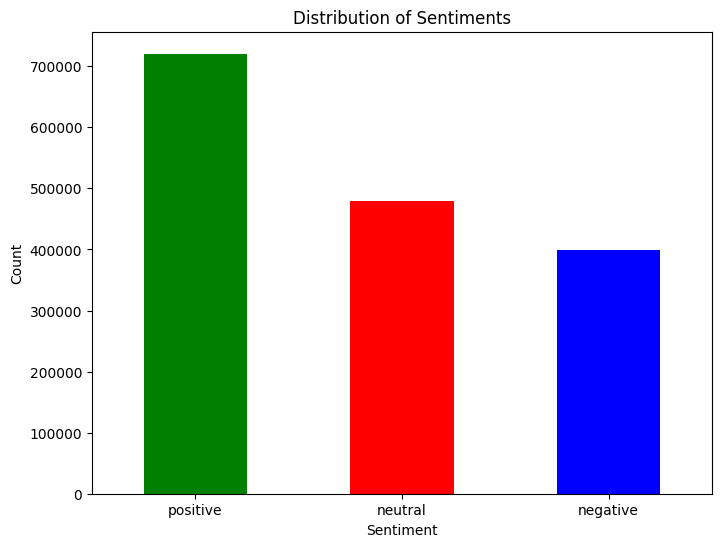

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks(rotation=0)  # To avoid rotating the x-axis labels
plt.show()

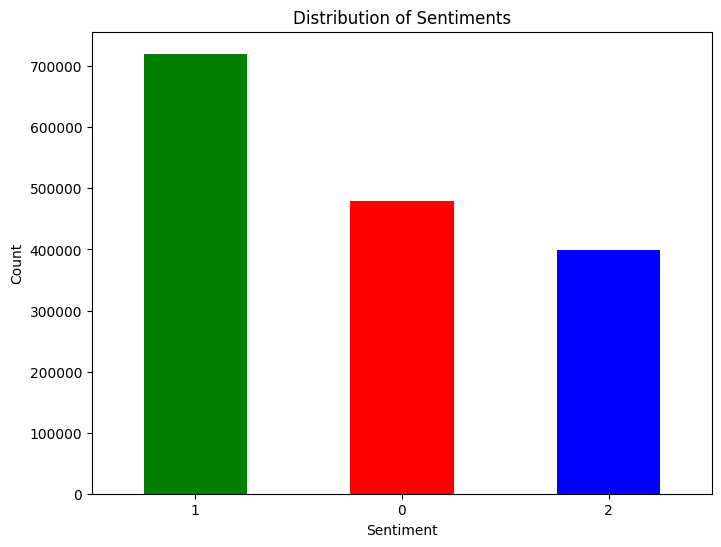

In [ ]:
sentiment_counts = df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks(rotation=0)  # To avoid rotating the x-axis labels
plt.show()

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
sw = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
sw.append("amp")

In [ ]:
def lemma_pos(text_list):
    pos = "n"
    lst = []
    for i,j in nltk.pos_tag(text_list):
        if j.startswith("J"):
            pos = "a"
        elif j.startswith("N"):
            pos = "n"
        elif j.startswith("R"):
            pos = "r"
        elif j.startswith("V"):
            pos = "v"
        else:
            pos = "n"
        lst.append(lemmatizer.lemmatize(i,pos=pos))
    return lst

In [ ]:
def preprocess_text(text):
    text = re.sub(r"[^A-Za-z0-9 ]"," ",text)
    text = text.lower()
    list_text = text.split()
    list_text = [word for word in list_text if word not in sw]
    list_text = [str(Word(word).singularize()) for word in list_text]
    list_text = lemma_pos(list_text)
    return " ".join(list_text)


In [ ]:
df["Tweet"]=df["Tweet"].astype("str")

In [ ]:
df["clean_tweet"]=df["Tweet"].progress_apply(preprocess_text)

100%|██████████| 1600000/1600000 [37:11<00:00, 716.98it/s]


In [ ]:
df["clean_tweet"][0][0]

'a'

In [ ]:
#df.to_csv("/content/drive/MyDrive/twitter/pos.csv")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/twitter/pos.csv").drop(columns=["Unnamed: 0"])

In [ ]:
df.head()

,Tweet,Polarity,Subjectivity,sentiment,label,clean_tweet
0,- Awww thats a bummer You shoulda got David Ca...,-0.3818,0.45,negative,2,awww that bummer shoulda get david carr third day
1,is upset that he cant update his Facebook by t...,-0.7269,0.00,negative,2,upset cant update facebook texting might cry r...
2,I dived many times for the ball Managed to sav...,0.4939,0.50,positive,1,dive many time ball manage save 50 rest go bound
3,my whole body feels itchy and like its on fire,-0.2500,0.40,negative,2,whole body feel itchy like fire
4,no its not behaving at all im mad why am i her...,-0.6597,1.00,negative,2,behave im mad cant see


In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
df["clean_tweet"].isna().sum()

6558

In [ ]:
df["label"].value_counts()

1    720481
0    473394
2    399567
Name: label, dtype: int64

In [ ]:
df["sentiment"].value_counts()

positive    720481
neutral     473394
negative    399567
Name: sentiment, dtype: int64

In [ ]:
df.dropna(subset = ["clean_tweet"],inplace = True)

In [ ]:
sentence = [text.split() for text in df["clean_tweet"]]

model_w2v = Word2Vec(sentence , vector_size = 100, min_count = 1,workers = 4)
model_w2v.save("/content/drive/MyDrive/twitter/word2vec.model")

In [ ]:
model_w2v.wv.most_similar("color")

[('colour', 0.8969885110855103),
 ('colmy', 0.8761964440345764),
 ('purple', 0.797401487827301),
 ('shiny', 0.7449732422828674),
 ('pink', 0.7367717623710632),
 ('shade', 0.7317405343055725),
 ('makeup', 0.7258070111274719),
 ('yellow', 0.723967432975769),
 ('lipstick', 0.7102681398391724),
 ('glittery', 0.7063634395599365)]

In [ ]:
def text_to_vec(text, model_w2v, workers=4):
    word_vec = [model_w2v.wv[word] for word in text.split() if word in model_w2v.wv]
    if not word_vec:
        return np.zeros(model_w2v.vector_size)
    return np.mean(word_vec, axis=0)


In [ ]:
df["word_vec"] = df["clean_tweet"].progress_apply(text_to_vec, args=(model_w2v,))

100%|██████████| 1593442/1593442 [00:49<00:00, 32115.23it/s]


In [ ]:
embedding_dim = model_w2v.vector_size
input_dim = embedding_dim


In [ ]:
df['tweet_length'] = df['clean_tweet'].apply(lambda x: len(x.split()))


In [ ]:
df["label"] = df["label"].astype(int)

In [ ]:
df["label"].value_counts()

1    720497
0    479777
2    399726
Name: label, dtype: int64

In [ ]:
#df.to_csv("/content/drive/MyDrive/twitter/w2v.csv")

In [41]:
df=pd.read_csv("/content/drive/MyDrive/twitter/pos.csv").drop(columns=["Unnamed: 0"])

In [42]:
df["clean_tweet"].isna().sum()

6558

In [43]:
df.dropna(subset = ["clean_tweet"],inplace = True)

In [44]:
df.head()

,Tweet,Polarity,Subjectivity,sentiment,label,clean_tweet
0,- Awww thats a bummer You shoulda got David Ca...,-0.3818,0.45,negative,2,awww that bummer shoulda get david carr third day
1,is upset that he cant update his Facebook by t...,-0.7269,0.00,negative,2,upset cant update facebook texting might cry r...
2,I dived many times for the ball Managed to sav...,0.4939,0.50,positive,1,dive many time ball manage save 50 rest go bound
3,my whole body feels itchy and like its on fire,-0.2500,0.40,negative,2,whole body feel itchy like fire
4,no its not behaving at all im mad why am i her...,-0.6597,1.00,negative,2,behave im mad cant see


In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Input, TextVectorization, Embedding
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import MultiHeadAttention, Embedding, Dense, LayerNormalization, Dropout, Input,BatchNormalization,Bidirectional
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model


In [46]:
tokenizer = Tokenizer(oov_token='<OOV>')

In [47]:
tokenizer.fit_on_texts(df["clean_tweet"])

In [48]:
sequence = tokenizer.texts_to_sequences(df["clean_tweet"])

In [49]:
df['tweet_length'] = df['clean_tweet'].apply(lambda x: len(x.split()))


In [50]:
sent_length = df['tweet_length'].max()
sent_length

36

In [51]:
tokenized_data = pad_sequences(sequence,
                          maxlen=sent_length,
                          truncating="post",
                          padding="post")

In [52]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(tokenized_data,df["label"],test_size = 0.2,random_state = 54)

In [ ]:
X_test

array([[    94,     35,     31, ...,      0,      0,      0],
       [  1226,   5914,     22, ...,      0,      0,      0],
       [ 40549,      6,  57881, ...,      0,      0,      0],
       ...,
       [   311,    756,      8, ...,      0,      0,      0],
       [   137,      2,   2160, ...,      0,      0,      0],
       [ 15409, 105019,      5, ...,      0,      0,      0]], dtype=int32)

In [ ]:
model_lstm = Sequential([
    Embedding(vocab_size, 100, input_length=sent_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])



In [ ]:
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history=model_lstm.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), callbacks = [early_stop])

Epoch 1/10
39837/39837 [==============================] - 908s 22ms/step - loss: 0.3119 - accuracy: 0.8989 - val_loss: 0.2719 - val_accuracy: 0.9116
Epoch 2/10
39837/39837 [==============================] - 859s 22ms/step - loss: 0.2480 - accuracy: 0.9190 - val_loss: 0.2758 - val_accuracy: 0.9094
Epoch 3/10
39837/39837 [==============================] - 859s 22ms/step - loss: 0.2152 - accuracy: 0.9298 - val_loss: 0.2938 - val_accuracy: 0.9031
Epoch 4/10
39837/39837 [==============================] - 905s 23ms/step - loss: 0.1915 - accuracy: 0.9379 - val_loss: 0.3273 - val_accuracy: 0.8935
Epoch 5/10
39837/39837 [==============================] - 861s 22ms/step - loss: 0.1739 - accuracy: 0.9438 - val_loss: 0.3668 - val_accuracy: 0.8842
Epoch 6/10
39837/39837 [==============================] - 893s 22ms/step - loss: 0.1606 - accuracy: 0.9483 - val_loss: 0.3768 - val_accuracy: 0.8850


In [ ]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1)

    # Plot accuracy
    ax1.plot(history.history['accuracy'], c='b', label='train')
    ax1.plot(history.history['val_accuracy'], c='r', label='val')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper left')

    # Plot loss
    ax2.plot(history.history['loss'], c='m', label='train')
    ax2.plot(history.history['val_loss'], c='c', label='val')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

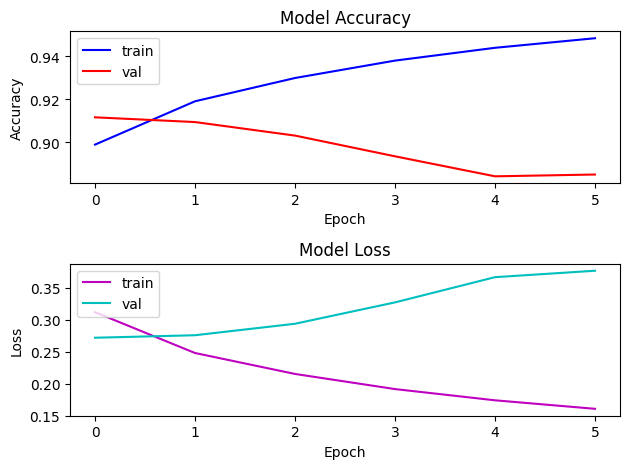

In [ ]:
plot_training_history(history)

In [ ]:
model_lstm.save('/content/drive/MyDrive/twitter/model_ls.h5')
print('lstm')


lstm


In [ ]:
Y_pred=model_lstm.predict(X_test)

9960/9960 [==============================] - 53s 5ms/step


In [ ]:
b=np.argmax(Y_pred,axis=1)

In [ ]:
Y_test.unique()

array([2, 0, 1])

In [ ]:
accuracy_score(Y_test,b)

0.911572096934629

In [23]:
from keras.models import load_model

model_ls = load_model('/content/drive/MyDrive/twitter/model_ls.h5')


In [66]:
neutral_emoji = '😐'
positive_emoji = '😊'
negative_emoji = '😞'


In [70]:
def predict_class1(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = [f'Neutral {neutral_emoji}', f'Positive {positive_emoji}', f'Negative {negative_emoji}']
    max_len = 36

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences([text])  # Pass text as a list for correct input
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model with verbose=0 to suppress progress messages
    yt = model_ls.predict(xt, verbose=0).argmax(axis=1)
    # Return the predicted sentiment instead of printing it
    return sentiment_classes[yt[0]]


In [71]:
statements = [
    "I just got promoted at work, and I'm ecstatic!",
    "The recent price hike for essential goods is frustrating.",
    "Spending time with family is always heartwarming.",
    "The long wait for the delayed flight was irritating.",
    "The surprise party they threw for me was touching.",
    "The meeting started on time, which was expected."]

ground_truth = [
    "Positive",
    "Negative",
    "Positive",
    "Negative",
    "Positive",
    "Neutral"
]

In [72]:
predicted_sentiments = [predict_class1(statement) for statement in statements]

# Compare predicted sentiments with ground truth
for statement, true_sentiment, predicted_sentiment in zip(statements, ground_truth, predicted_sentiments):
    print(f"Statement: {statement}")
    print(f"True Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {predicted_sentiment}\n")


Statement: I just got promoted at work, and I'm ecstatic!
True Sentiment: Positive
Predicted Sentiment: Positive 😊

Statement: The recent price hike for essential goods is frustrating.
True Sentiment: Negative
Predicted Sentiment: Negative 😞

Statement: Spending time with family is always heartwarming.
True Sentiment: Positive
Predicted Sentiment: Neutral 😐

Statement: The long wait for the delayed flight was irritating.
True Sentiment: Negative
Predicted Sentiment: Negative 😞

Statement: The surprise party they threw for me was touching.
True Sentiment: Positive
Predicted Sentiment: Positive 😊

Statement: The meeting started on time, which was expected.
True Sentiment: Neutral
Predicted Sentiment: Neutral 😐



In [73]:
predict_class1("im human")

'Neutral 😐'

## GRU MODEL

In [ ]:
gru_model = Sequential([
    Embedding(vocab_size, 64, input_length=sent_length),
    GRU(128, return_sequences=True),
    Dropout(0.5),  # Add dropout after the first GRU layer
    GRU(128),
    Dropout(0.5),  # Add dropout after the second GRU layer
    BatchNormalization(),  # Add batch normalization
    Dense(3, activation='softmax')
])

In [ ]:
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
gru_model_history=gru_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), callbacks = [early_stop])

Epoch 1/30
39837/39837 [==============================] - 580s 14ms/step - loss: 0.3717 - accuracy: 0.8685 - val_loss: 0.2773 - val_accuracy: 0.9098
Epoch 2/30
39837/39837 [==============================] - 556s 14ms/step - loss: 0.2717 - accuracy: 0.9131 - val_loss: 0.2756 - val_accuracy: 0.9110
Epoch 3/30
39837/39837 [==============================] - 571s 14ms/step - loss: 0.2379 - accuracy: 0.9247 - val_loss: 0.2873 - val_accuracy: 0.9064
Epoch 4/30
39837/39837 [==============================] - 576s 14ms/step - loss: 0.2113 - accuracy: 0.9338 - val_loss: 0.2986 - val_accuracy: 0.9058
Epoch 5/30
39837/39837 [==============================] - 567s 14ms/step - loss: 0.1949 - accuracy: 0.9395 - val_loss: 0.3023 - val_accuracy: 0.9043
Epoch 6/30
39837/39837 [==============================] - 558s 14ms/step - loss: 0.1832 - accuracy: 0.9436 - val_loss: 0.3127 - val_accuracy: 0.9016
Epoch 7/30
39837/39837 [==============================] - 566s 14ms/step - loss: 0.1772 - accuracy: 0.9455

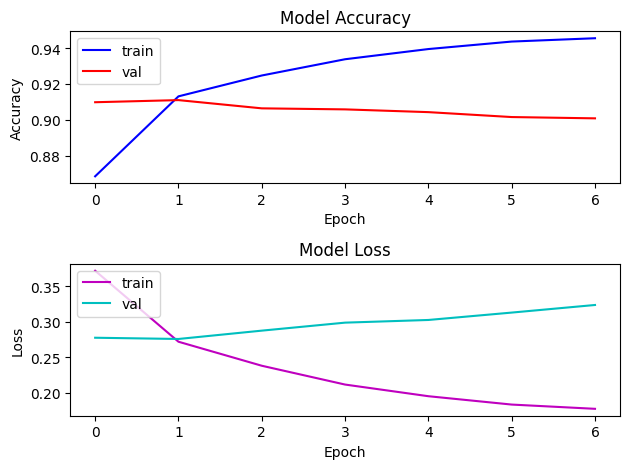

In [ ]:
plot_training_history(gru_model_history)

In [ ]:
gru_model.save('/content/drive/MyDrive/twitter/gru_model.h5')
print('gru_model')

gru_model


In [ ]:
Y_pred=gru_model.predict(X_test)

9960/9960 [==============================] - 30s 3ms/step


In [ ]:
a=np.argmax(Y_pred,axis=1)

In [ ]:
Y_test

437059     2
489965     0
1539723    1
216604     2
1441659    1
          ..
1036581    1
1111260    1
1361357    1
1028012    1
688015     0
Name: label, Length: 318689, dtype: int64

In [ ]:
accuracy_score(Y_test,a)

0.9110072829623865

In [ ]:
df["clean_tweet"][0]

'awww that bummer shoulda get david carr third day'

In [36]:
gruu_model=load_model('/content/drive/MyDrive/twitter/gru_model.h5')

In [78]:
# Load model
model = gruu_model  # Make sure 'gruu_model' is correctly loaded

def predict_class2(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = [f'Neutral {neutral_emoji}', f'Positive {positive_emoji}', f'Negative {negative_emoji}']
    max_len = 36

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences([text])  # Pass text as a list for correct input
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model with verbose=0 to suppress progress messages
    yt = model.predict(xt, verbose=0).argmax(axis=1)
    # Return the predicted sentiment instead of printing it
    return sentiment_classes[yt[0]]


In [79]:
predicted_sentiments = [predict_class2(statement) for statement in statements]

# Compare predicted sentiments with ground truth
for statement, true_sentiment, predicted_sentiment in zip(statements, ground_truth, predicted_sentiments):
    print(f"Statement: {statement}")
    print(f"True Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {predicted_sentiment}\n")

Statement: I just got promoted at work, and I'm ecstatic!
True Sentiment: Positive
Predicted Sentiment: Positive 😊

Statement: The recent price hike for essential goods is frustrating.
True Sentiment: Negative
Predicted Sentiment: Negative 😞

Statement: Spending time with family is always heartwarming.
True Sentiment: Positive
Predicted Sentiment: Positive 😊

Statement: The long wait for the delayed flight was irritating.
True Sentiment: Negative
Predicted Sentiment: Negative 😞

Statement: The surprise party they threw for me was touching.
True Sentiment: Positive
Predicted Sentiment: Positive 😊

Statement: The meeting started on time, which was expected.
True Sentiment: Neutral
Predicted Sentiment: Neutral 😐



## BERT